### Exploring fatalities and crashes across time
- Objective is to find operators with the highest number of crashes 
- Select top 5 and observe across decade

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [4]:
df = pd.read_json("data/silver/1920_2024.json")
df.Date = pd.to_datetime(df.Date)
stop_words = set(stopwords.words("english"))

In [15]:
df_2 = df.dropna(axis=0,how="any",subset=["Summary"])
df_2[:2]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,None,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,"{'total': 35, 'passengers': 31, 'crew': 4}","{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,"{'total': 7, 'passengers': 3, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line


In [16]:
df_2.shape

(4969, 17)

In [17]:
df_2["word_list"] = df_2.Summary.apply(lambda x : x.split(" "))

/var/folders/sr/32z6khr97xs2g11w52pbkzww0000gn/T/ipykernel_21253/4113127868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["word_list"] = df_2.Summary.apply(lambda x : x.split(" "))


In [18]:
df_2["word_list"] 

0       [Crashed, into, approach, lights, while, attem...
1       [The, plane, struck, a, tree, on, a, mountain,...
2       [The, plane, crashed, into, mountains, while, ...
3       [Both, aircraft, crashed, after, a, midair, co...
4       [Crashed, 10, miles, east, of, Cagliari, in, t...
                              ...                        
5032    [The, cargo, plane, crashed, into, trees, on, ...
5033    [In, heavy, fog, , the, crew, continued, their...
5034    [The, survey, fllight, deviated, from, the, ap...
5035    [The, aircraft, crashed, into, an, industrial,...
5036    [Struck, the, slope, of, Mt, Pintado, located,...
Name: word_list, Length: 4969, dtype: object

In [7]:
lemmatizer = WordNetLemmatizer()

def add_stop_words(x):
    return [ stop_words.add(i) for i in x]

def remove_stop_word(x):
    return [i for i in x if i.lower() not in stop_words]

In [9]:
df_2["word_list_removed_stop_words"] = df_2["word_list"].apply(remove_stop_word)

/var/folders/sr/32z6khr97xs2g11w52pbkzww0000gn/T/ipykernel_21253/3828410851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["word_list_removed_stop_words"] = df_2["word_list"].apply(remove_stop_word)


In [13]:
k = [lemmatizer.lemmatize(i.lower(),  pos='v') for j in  df_2["word_list_removed_stop_words"] for i in j]

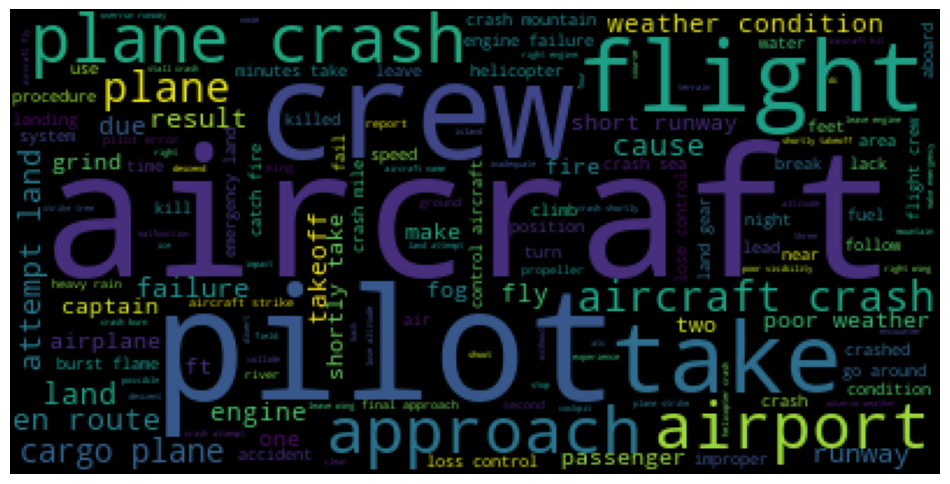

In [14]:
width = 12
height = 12
plt.figure(figsize=(width, height))
#text = 'all your base are belong to us all of your base base base'
wc = WordCloud().generate(" ".join(k))
plt.imshow(wc)
# wordcloud = WordCloud(font_path='/Library/Fonts/Gotham-Bold.otf',width=1800,height=1400).generate(str(hr1_filter))
# plt.imshow(wordcloud)
plt.axis("off")
plt.show()